# Milestone 1 – Citi Bike Boston: Vorhersage der Fahrtzeit

**Datensatz**: [Citi Bike Boston Trip Data](https://s3.amazonaws.com/hubway-data/202408-bluebikes-tripdata.zip), August 2024
**Prediction Task**: In this Project we are trying to predict the development of the usage from electronic and classics Bikes in the area of Boston. We will be looking at different years of months an compare the data to understand the development over the last few years and with that develop a prediction model for the future usage of bikes. We also want to include weather data as an additional feature to improve the data. We do this because we think there is a correlation between the weather and the willingness to use bikes. As for the predictive Model we choose the regression Model.



**Planned Features:**

- Start time (`started_at`)
- Day of the week (`weekday`)
- Time of day category (`time_of_day`)
- Duration Time in Minutes (`minutes`)
- Start station (`start_station_id`)
- User type (`member_casual`)
- Weather (optional: temperature, rain)

This project uses data from August 2024, comprising approximately 530,000 trips.

In [ ]:
import pandas as pd

csv_path = r"C:\Users\hanac\PycharmProjects\Data-Science-and-Machine-Learning\202408-bluebikes-tripdata.csv"

df = pd.read_csv(
    csv_path,
    engine="python",
    sep=None,
    on_bad_lines="skip",

)

print(df.shape)
df.head(1000000000)


In [ ]:
df.info()
df.describe()


In [ ]:
import pandas as pd


csv_path = r"C:\Users\hanac\PycharmProjects\Data-Science-and-Machine-Learning\202408-bluebikes-tripdata.csv"
df = pd.read_csv(csv_path, engine="python", sep=None, on_bad_lines="warn")

print("Ursprünglicher Datensatz:")
print(df.shape)


df['started_at'] = pd.to_datetime(df['started_at'], dayfirst=True, errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], dayfirst=True, errors='coerce')
print("Nach datetime-Konvertierung:")
print(df.shape)


df = df.dropna(subset=['started_at', 'ended_at'])
print("Nach Entfernen von NaT-Zeilen:")
print(df.shape)


df['tripduration'] = (df['ended_at'] - df['started_at']).dt.total_seconds()


df = df[df['tripduration'] > 0]
print("Nach Entfernen negativer/0-Fahrzeiten:")
print(df.shape)


df['tripduration'] = pd.to_numeric(df['tripduration'], errors='coerce')


df['duration_min'] = df['tripduration'] / 60


print("\n Spaltentypen von tripduration und duration_min:")
print(df[['tripduration', 'duration_min']].dtypes)

print("\n Beispielhafte Einträge:")
print(df[['started_at', 'ended_at', 'tripduration', 'duration_min']].head())


In [ ]:

df['weekday'] = df['started_at'].dt.weekday
df['hour'] = df['started_at'].dt.hour


def get_time_category(hour):
    if 6 <= hour < 12:
        return 'Morgen'
    elif 12 <= hour < 18:
        return 'Nachmittag'
    elif 18 <= hour < 24:
        return 'Abend'
    else:
        return 'Nacht'

df['time_of_day'] = df['hour'].apply(get_time_category)


## Nächste Schritte (Milestone 2+)

The next steps will include the data preparation. Our goal here will be to sort the Data of the days of the month in time boxes for example morning, noon, afternoon, evening etc. With this we can accumulate the highest average of use-time through the day as well as highest and lowest peaks.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_trips = pd.read_csv('202408-bluebikes-tripdata.csv', sep=';', on_bad_lines='skip')


df_trips['started_at'] = pd.to_datetime(df_trips['started_at'], format='%d.%m.%Y %H:%M', errors='coerce')
df_trips = df_trips.dropna(subset=['started_at'])


for col in ['start_lat', 'start_lng', 'end_lat', 'end_lng']:
    # Entferne alle Punkte in den Strings (Punkte als Tausender-Trenner!)
    df_trips[col] = df_trips[col].astype(str).str.replace('.', '', regex=False)
    # Nun in float umwandeln, Fehler als NaN behandeln
    df_trips[col] = pd.to_numeric(df_trips[col], errors='coerce')


df_trips = df_trips.dropna(subset=['start_lat', 'start_lng', 'end_lat', 'end_lng'])


plt.figure(figsize=(10, 8))
sns.kdeplot(
    x=df_trips['start_lng'],
    y=df_trips['start_lat'],
    cmap="coolwarm",
    fill=True,
    thresh=0.05,
    levels=100
)
plt.title('Heatmap der Startpunkte der Bluebikes-Fahrten (Aug 2024)')
plt.xlabel('Längengrad')
plt.ylabel('Breitengrad')
plt.show()



In [ ]:
df_trips['date'] = df_trips['started_at'].dt.date
fahrten_pro_tag = df_trips.groupby('date').size()

plt.figure(figsize=(12,6))
fahrten_pro_tag.plot()
plt.title("Anzahl der Fahrten pro Tag")
plt.xlabel("Datum")
plt.ylabel("Anzahl Fahrten")
plt.grid()
plt.show()


In [ ]:

df_trips['started_at'] = pd.to_datetime(df_trips['started_at'])
df_trips.set_index('started_at', inplace=True)


daily_counts = df_trips.resample('D').size()
daily_counts.plot(title='Daily Bluebikes Trip Count (Aug 2024)', figsize=(10,4))


In [ ]:
def get_daytime(hour):
    if 5 <= hour < 11:
        return 'Morgens (05–11 Uhr)'
    elif 11 <= hour < 17:
        return 'Mittags (11–17 Uhr)'
    elif 17 <= hour < 21:
        return 'Abends (17–21 Uhr)'
    else:
        return 'Nacht (21–05 Uhr)'


df['hour'] = df['started_at'].dt.hour
df['daytime'] = df['hour'].apply(get_daytime)


daytime_counts = df['daytime'].value_counts().reindex(
    ['Morgens (05–11 Uhr)', 'Mittags (11–17 Uhr)', 'Abends (17–21 Uhr)', 'Nacht (21–05 Uhr)']
)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=daytime_counts.index, y=daytime_counts.values, palette='coolwarm')
plt.title('Anzahl der Fahrten nach Tageszeit')
plt.xlabel('Tageszeit')
plt.ylabel('Anzahl der Fahrten')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


csv_path = r"C:\Users\hanac\PycharmProjects\Data-Science-and-Machine-Learning\202408-bluebikes-tripdata.csv"
df = pd.read_csv(csv_path, engine="python", sep=None, on_bad_lines="skip")

)
df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')


df = df.dropna(subset=['started_at'])


def get_daytime(hour):
    if 5 <= hour < 11:
        return 'Morgens (05–11 Uhr)'
    elif 11 <= hour < 17:
        return 'Mittags (11–17 Uhr)'
    elif 17 <= hour < 21:
        return 'Abends (17–21 Uhr)'
    else:
        return 'Nacht (21–05 Uhr)'

df['hour'] = df['started_at'].dt.hour
df['daytime'] = df['hour'].apply(get_daytime)


order = ['Morgens (05–11 Uhr)', 'Mittags (11–17 Uhr)', 'Abends (17–21 Uhr)', 'Nacht (21–05 Uhr)']
daytime_counts = df['daytime'].value_counts().reindex(order)


plt.figure(figsize=(10, 6))
sns.barplot(x=daytime_counts.index, y=daytime_counts.values, palette='coolwarm')
plt.title('Anzahl der Fahrten nach Tageszeit')
plt.xlabel('Tageszeit')
plt.ylabel('Anzahl der Fahrten')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) CSV-Datei einlesen
csv_path = r"C:\Users\hanac\PycharmProjects\Data-Science-and-Machine-Learning\202408-bluebikes-tripdata.csv"
df = pd.read_csv(csv_path, engine="python", sep=None, on_bad_lines="skip")

# 2) 'started_at' in datetime umwandeln
df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')

# 3) Zeilen mit ungültigen Datumswerten entfernen
df = df.dropna(subset=['started_at'])

# 4) Tageszeit bestimmen
def get_daytime(hour):
    if 5 <= hour < 11:
        return 'Morgens (05–11 Uhr)'
    elif 11 <= hour < 17:
        return 'Mittags (11–17 Uhr)'
    elif 17 <= hour < 21:
        return 'Abends (17–21 Uhr)'
    else:
        return 'Nacht (21–05 Uhr)'

df['hour'] = df['started_at'].dt.hour
df['daytime'] = df['hour'].apply(get_daytime)

# 5) Gruppieren und zählen
order = ['Morgens (05–11 Uhr)', 'Mittags (11–17 Uhr)', 'Abends (17–21 Uhr)', 'Nacht (21–05 Uhr)']
daytime_counts = df['daytime'].value_counts().reindex(order)

# 6) Visualisierung – zukunftssicher ohne Warnung
plt.figure(figsize=(10, 6))
sns.barplot(
    x=daytime_counts.index,
    y=daytime_counts.values,
    hue=daytime_counts.index,
    palette='coolwarm',
    legend=False
)
plt.title('Anzahl der Fahrten nach Tageszeit')
plt.xlabel('Tageszeit')
plt.ylabel('Anzahl der Fahrten')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('202408-bluebikes-tripdata.csv', parse_dates=['starttime'])


df['date'] = df['starttime'].dt.date


usage = (
    df
    .groupby(['start_station_name', 'date'])
    .size()
    .reset_index(name='trip_count')
)


usage_pivot = (
    usage
    .pivot(index='date',
           columns='start_station_name',
           values='trip_count')
    .fillna(0)
)


plt.figure(figsize=(14, 6))
for station in usage_pivot.columns:
    plt.plot(usage_pivot.index, usage_pivot[station], lw=1, label=station)

plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.title('Daily Trip Counts per Start Station')
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1), fontsize='small')
plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 8))
sns.heatmap(
    usage_pivot.T,
    cbar_kws={'label': 'Trips per Day'},
    linewidths=0.5,
    linecolor='gray'
)
plt.xlabel('Date')
plt.ylabel('Station')
plt.title('Heatmap of Daily Trips by Station')
plt.tight_layout()
plt.show()

ValueError: Missing column provided to 'parse_dates': 'starttime'

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error


df = pd.read_csv("202408-bluebikes-tripdata.csv", sep=";")


df['started_at'] = pd.to_datetime(df['started_at'], format="%d.%m.%Y %H:%M", errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], format="%d.%m.%Y %H:%M", errors='coerce')
df['duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60


df = df.dropna(subset=['started_at', 'ended_at', 'duration_min', 'start_station_name'])
df = df[df['duration_min'] > 0]


encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(df[['start_station_name']])
X = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['start_station_name']))
y = df['duration_min']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print(f"RMSE (Root Mean Squared Error): {rmse:.2f} Minuten")



In [3]:
print(df.columns.tolist())


NameError: name 'df' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df['date'] = pd.to_datetime(df['starttime']).dt.date


usage = (
    df
    .groupby(['start_station_name', 'date'])
    .size()
    .reset_index(name='trip_count')
)


usage_pivot = usage.pivot(index='date',
                          columns='start_station_name',
                          values='trip_count')\
                   .fillna(0)


plt.figure(figsize=(14, 6))
for station in usage_pivot.columns:
    plt.plot(usage_pivot.index, usage_pivot[station], lw=1, label=station)

plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.title('Daily Number of Trips per Start Station')
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1), ncol=1, fontsize='small')
plt.tight_layout()
plt.show()



import seaborn as sns

plt.figure(figsize=(14, 8))
sns.heatmap(
    usage_pivot.T,                     # stations on y‐axis
    cbar_kws={'label': 'Trips / Day'},
    linewidths=0.5,
    linecolor='gray'
)
plt.xlabel('Date')
plt.ylabel('Station')
plt.title('Heatmap of Daily Trip Counts per Station')
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd

df = pd.read_csv(
    '202408-bluebikes-tripdata.csv',  # adjust if your filename differs
    engine='python',                  # allows more flexible parsing
    sep=None,                         # let pandas auto-detect separator
    on_bad_lines='skip'              # skip rows with too many/few columns
)


print("Loaded columns:", df.columns.tolist())
df.head()
import pandas as pd

df = pd.read_csv(
    '202408-bluebikes-tripdata.csv',  # adjust if your filename differs
    engine='python',                  # allows more flexible parsing
    sep=None,                         # let pandas auto-detect separator
    on_bad_lines='skip'              # skip rows with too many/few columns
)


print("Loaded columns:", df.columns.tolist())
df.head()

Loaded columns: ['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual']
Loaded columns: ['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual']


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9555B91492D25570,classic_bike,01.08.2024 07:10,01.08.2024 07:26,Main St at Baldwin St,D32036,Purchase St at Pearl St,A32026,42.380.857,-71.070.629,42.354.659,-71.053.181,member
1,82D93E8BDD45E43F,electric_bike,12.08.2024 15:43,12.08.2024 15:46,75 Binney St,M32064,Cambridge Crossing at North First Street,M32077,4.236.550.728.505.650,-710.801.375.997.653,42.371.141,-71.076.198,member
2,C99E6E4F4C76DFF9,classic_bike,28.08.2024 21:06,28.08.2024 21:10,Copley Square - Dartmouth St at Boylston St,D32005,Prudential Center - 101 Huntington Ave,C32007,4.234.992.828.230.050,-7.107.739.206.866.420,4.234.652.003.998.410,-7.108.065.776.545.110,member
3,AB67BC6000A4D4CE,classic_bike,11.08.2024 13:14,11.08.2024 13:21,Ink Block - Harrison Ave at Herald St,C32025,Massachusetts Ave at Columbus Ave,C32004,42.345.901,-71.063.187,42.340.835,-710.816.197,member
4,C0B1FA5CE04B942F,electric_bike,12.08.2024 10:43,12.08.2024 11:59,Copley Square - Dartmouth St at Boylston St,D32005,Prudential Center - 101 Huntington Ave,C32007,4.234.992.828.230.050,-7.107.739.206.866.420,4.234.652.003.998.410,-7.108.065.776.545.110,member


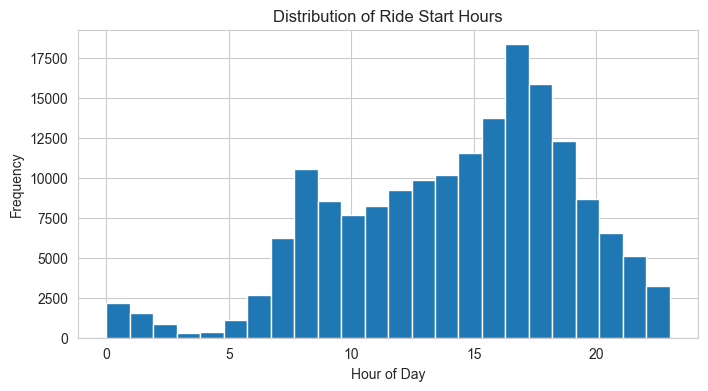

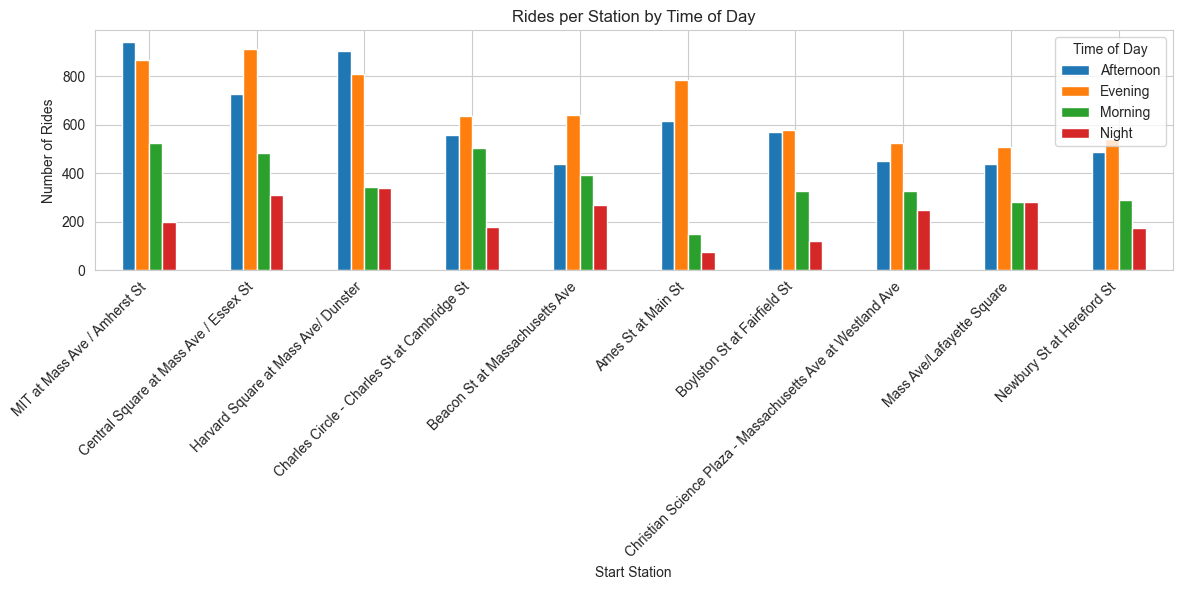

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(
    '202408-bluebikes-tripdata.csv',
    engine='python',
    sep=None,
    on_bad_lines='skip'
)


df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')


df = df.dropna(subset=['started_at'])


df['hour'] = df['started_at'].dt.hour


df['hour'].plot.hist(bins=24, figsize=(8, 4), title='Distribution of Ride Start Hours')
plt.xlabel("Hour of Day")
plt.show()


def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day_category'] = df['hour'].apply(get_time_of_day)


rides_by_station_time = (
    df.groupby(['start_station_name', 'time_of_day_category'])
      .size()
      .reset_index(name='ride_count')
)


pivot_df = rides_by_station_time.pivot(
    index='start_station_name',
    columns='time_of_day_category',
    values='ride_count'
).fillna(0)


top10 = pivot_df.sum(axis=1).nlargest(10).index
pivot_top10 = pivot_df.loc[top10]


sns.set_style("whitegrid")
pivot_top10.plot(kind='bar', figsize=(12, 6))
plt.title('Rides per Station by Time of Day')
plt.xlabel('Start Station')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Time of Day')
plt.tight_layout()
plt.show()